In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

In [26]:
df = pd.read_csv('data.csv')
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [29]:
column_names = df.columns
column_names

Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')

In [30]:
for i in column_names:
    if df[i].dtype != type(1):
        df[i],class_labels = pd.factorize(df[i])
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,6,4,3,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0
2,2,3,9,1,1,1,0,0,1,0,2,2,2,1,2,1,0,1,0,0
3,2,6,3,5,1,1,2,1,1,0,3,0,3,1,3,0,0,0,1,0
4,2,0,3,4,0,0,3,2,1,1,4,1,0,0,4,1,1,0,0,0


In [31]:
X = df.drop('Suggested Job Role',axis='columns')
y = df['Suggested Job Role']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =1)

In [37]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(19,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [38]:
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error loss for regression
              metrics=['mae']) 

In [39]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
138/138 [==============================] - 0s 1ms/step - loss: 15.1275 - mae: 3.2364 - val_loss: 12.8993 - val_mae: 3.0433
Epoch 2/100
138/138 [==============================] - 0s 742us/step - loss: 12.5377 - mae: 3.0264 - val_loss: 12.7794 - val_mae: 3.0450
Epoch 3/100
138/138 [==============================] - 0s 737us/step - loss: 12.4596 - mae: 3.0175 - val_loss: 12.6544 - val_mae: 3.0273
Epoch 4/100
138/138 [==============================] - 0s 711us/step - loss: 12.2400 - mae: 2.9953 - val_loss: 12.7208 - val_mae: 3.0283
Epoch 5/100
138/138 [==============================] - 0s 706us/step - loss: 12.1886 - mae: 2.9886 - val_loss: 13.0373 - val_mae: 3.0688
Epoch 6/100
138/138 [==============================] - 0s 702us/step - loss: 12.2313 - mae: 2.9821 - val_loss: 12.5017 - val_mae: 3.0226
Epoch 7/100
138/138 [==============================] - 0s 701us/step - loss: 12.0205 - mae: 2.9671 - val_loss: 12.5380 - val_mae: 3.0258
Epoch 8/100
138/138 [======================

In [41]:
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)
predictions = (predictions.astype(int))
len(X_test)

44/44 [==============================] - 0s 472us/step


1381

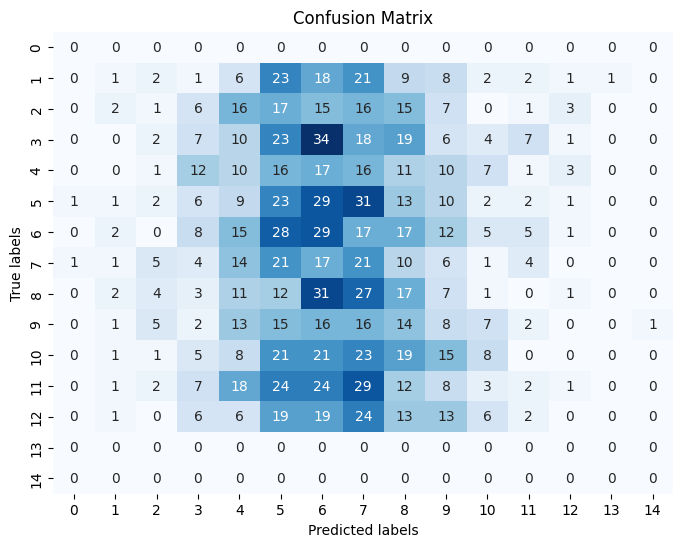

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()